# Compare consensus data by enrichment score

There are 8 different ways to process the CP data. See the LINCS github for more details.
Here I reason why I have choosen the modz feature select by DMSO as my data for the non spherized data.


In [1]:
ROOT = '/Users/mbornhol/git/neural-profiling/'

import os
import pandas as pd
import matplotlib.pyplot as plt
from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, ROOT)
from utils import data_selection as ds


In [2]:
lincs_dir = '/Users/mbornhol/git/lincs-cell-painting/consensus/2016_04_01_a549_48hr_batch1/'
results = []

for file in os.listdir(lincs_dir):
    print(f'processing {file}')
    df = pd.read_csv(os.path.join(lincs_dir, file))
    df = ds.clean_moas(df)
    df = ds.drop_feats(df, 30)
    features = infer_cp_features(df)
    meta_features = infer_cp_features(df, metadata=True)
    enrichment_result = evaluate(
        profiles=df,
        features=features,
        meta_features=meta_features,
        replicate_groups=['Metadata_moa'],
        operation="enrichment",
        similarity_metric="pearson",
        enrichment_percentile=0.99,
    )
    results.append(enrichment_result)

processing 2016_04_01_a549_48hr_batch1_consensus_modz_feature_select.csv.gz
dropped 28 features
processing 2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz
dropped 116 features
processing 2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz
dropped 104 features
processing 2016_04_01_a549_48hr_batch1_consensus_median_feature_select.csv.gz
dropped 39 features
processing 2016_04_01_a549_48hr_batch1_consensus_median.csv.gz
dropped 368 features
processing 2016_04_01_a549_48hr_batch1_consensus_modz.csv.gz
dropped 385 features
processing 2016_04_01_a549_48hr_batch1_consensus_median_dmso.csv.gz
dropped 588 features
processing 2016_04_01_a549_48hr_batch1_consensus_modz_dmso.csv.gz
dropped 668 features


In [3]:
labels = [label[38:] for label in os.listdir(lincs_dir)]
odds = [float(df["ods_ratio"]) for df in results]

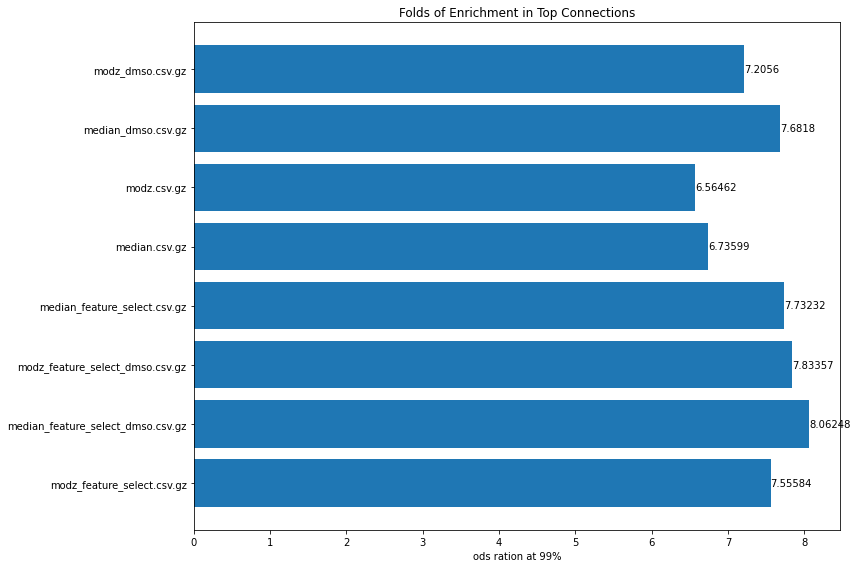

In [4]:
plt.style.use({'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
bars = ax.barh(labels, odds, align='center')
ax.bar_label(bars)
plt.xlabel('ods ration at 99%')
plt.tight_layout()
plt.show()

## The result:

Modz and median feature selected by DMSO are the best between these 8 consensus data files.

I will be using the modz selected by DMSO in the future whenever I am refering to non spherized CP data.


